In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from scipy import stats
import seaborn as sns

# Load the Data

This time we'll load the data as geojson and CSV files directly from a github repository I've created at https://github.com/thomaspingel/geodata

In [2]:
# Load polygon data
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/lower48_counties_20m.geojson'
counties = geopandas.read_file(url)

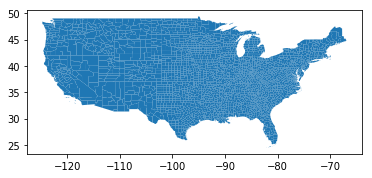

In [3]:
counties.plot()

In [4]:
counties.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01001,01,001,Autauga,County,594.436,"(POLYGON ((-86.496774 32.344437, -86.717896999..."
1,0500000US01009,01,009,Blount,County,644.776,"(POLYGON ((-86.577799 33.765316, -86.759144000..."
2,0500000US01017,01,017,Chambers,County,596.531,"(POLYGON ((-85.18413099999999 32.870525, -85.1..."
3,0500000US01021,01,021,Chilton,County,692.854,"(POLYGON ((-86.51734399999999 33.020566, -86.5..."
4,0500000US01033,01,033,Colbert,County,592.619,"(POLYGON ((-88.139988 34.581703, -88.139246 34..."


In [5]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/state_groups.csv'
groups = pd.read_csv(url,dtype={'fips':'str'})
groups.head()

,state,fips,code,region,division,election16
0,Alabama,01,AL,South,East South Central,gop
1,Alaska,02,AK,West,Pacific,gop
2,Arizona,04,AZ,West,Mountain,gop
3,Arkansas,05,AR,South,West South Central,gop
4,California,06,CA,West,Pacific,dem


In [6]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/CHR_2019.csv'
chr_data = pd.read_csv(url,dtype={'fips':'str','state_fips':'str','county_fips':'str'})
chr_data.head()

,fips,state,state_fips,county,county_fips,Premature death - Years of Potential Life Lost Rate - 2019,Premature death - 95% CI - Low - 2019,Premature death - 95% CI - High - 2019,Premature death - Quartile - 2019,Premature death - YPLL Rate (Black) - 2019,...,Demographics - % Hispanic - 2019,Demographics - # Non-Hispanic White - 2019,Demographics - % Non-Hispanic White - 2019,Demographics - # Not Proficient in English - 2019,Demographics - % Not Proficient in English - 2019,Demographics - 95% CI - Low - 2019,Demographics - 95% CI - High - 2019,Demographics - % Female - 2019,Demographics - # Rural - 2019,Demographics - % Rural - 2019
0,01001,Alabama,01,Autauga,001,8824.057123,7935.325830,9712.788417,1,10471.25299,...,2.857452,41336,74.473912,430,0.828548,0.422472,1.234624,51.342246,22921.0,42.002162
1,01003,Alabama,01,Baldwin,003,7224.632160,6794.128380,7655.135940,1,10042.47287,...,4.550200,176582,83.047388,872,0.454512,0.282144,0.626880,51.452772,77060.0,42.279099
2,01005,Alabama,01,Barbour,005,9586.165037,8200.117541,10972.212530,1,11332.56291,...,4.206569,11613,45.955679,297,1.199273,0.580536,1.818011,47.229917,18613.0,67.789635
3,01007,Alabama,01,Bibb,007,11783.543680,10159.978320,13407.109030,3,14812.53928,...,2.638080,16842,74.298571,84,0.394348,0.000000,0.933361,46.453150,15663.0,68.352607
4,01009,Alabama,01,Blount,009,10908.101820,9895.582572,11920.621070,3,NaN,...,9.565097,50439,86.944306,1013,1.870004,1.364180,2.375829,50.688639,51562.0,89.951502


# Visualizing group differences with boxplots

## Joining data

In [7]:
# First, we'll join our groups to our county health rankings data frame

df = chr_data.merge(groups,left_on='state_fips',right_on='fips')

In [8]:
df.columns.values

array(['fips_x', 'state_x', 'state_fips', 'county', 'county_fips',
       'Premature death - Years of Potential Life Lost Rate - 2019',
       'Premature death - 95% CI - Low - 2019',
       'Premature death - 95% CI - High - 2019',
       'Premature death - Quartile - 2019',
       'Premature death - YPLL Rate (Black) - 2019',
       'Premature death - YPLL Rate (Hispanic) - 2019',
       'Premature death - YPLL Rate (White) - 2019',
       'Poor or fair health - % Fair/Poor - 2019',
       'Poor or fair health - 95% CI - Low - 2019',
       'Poor or fair health - 95% CI - High - 2019',
       'Poor or fair health - Quartile - 2019',
       'Poor physical health days - Physically Unhealthy Days - 2019',
       'Poor physical health days - 95% CI - Low - 2019',
       'Poor physical health days - 95% CI - High - 2019',
       'Poor physical health days - Quartile - 2019',
       'Poor mental health days - Mentally Unhealthy Days - 2019',
       'Poor mental health days - 95% CI - Low -

In [9]:
df.head()

,fips_x,state_x,state_fips,county,county_fips,Premature death - Years of Potential Life Lost Rate - 2019,Premature death - 95% CI - Low - 2019,Premature death - 95% CI - High - 2019,Premature death - Quartile - 2019,Premature death - YPLL Rate (Black) - 2019,...,Demographics - 95% CI - High - 2019,Demographics - % Female - 2019,Demographics - # Rural - 2019,Demographics - % Rural - 2019,state_y,fips_y,code,region,division,election16
0,01001,Alabama,01,Autauga,001,8824.057123,7935.325830,9712.788417,1,10471.25299,...,1.234624,51.342246,22921.0,42.002162,Alabama,01,AL,South,East South Central,gop
1,01003,Alabama,01,Baldwin,003,7224.632160,6794.128380,7655.135940,1,10042.47287,...,0.626880,51.452772,77060.0,42.279099,Alabama,01,AL,South,East South Central,gop
2,01005,Alabama,01,Barbour,005,9586.165037,8200.117541,10972.212530,1,11332.56291,...,1.818011,47.229917,18613.0,67.789635,Alabama,01,AL,South,East South Central,gop
3,01007,Alabama,01,Bibb,007,11783.543680,10159.978320,13407.109030,3,14812.53928,...,0.933361,46.453150,15663.0,68.352607,Alabama,01,AL,South,East South Central,gop
4,01009,Alabama,01,Blount,009,10908.101820,9895.582572,11920.621070,3,NaN,...,2.375829,50.688639,51562.0,89.951502,Alabama,01,AL,South,East South Central,gop


In [10]:
# We can in turn join this to our geodata:
# We have to make a geoid first, so that we can join:
counties['geoid'] = counties['STATE'] + counties['COUNTY']

gdf = counties.merge(df,left_on='geoid',right_on='fips_x')

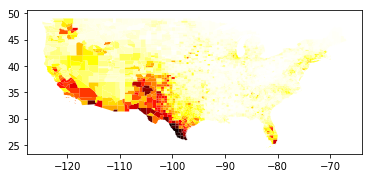

In [11]:
# Mapping a variable:

gdf.plot(column='Demographics - % Hispanic - 2019',cmap="hot_r")

## Visualizing the differences

Althought we're using the gdf (geodataframe object) from here on out, we could accomplish the same analysis using df (our joined Pandas dataframe) since we're not explicitly using the geometric properties here.

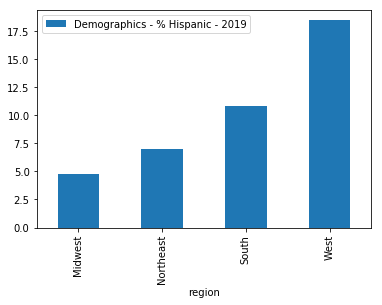

In [12]:
# One simple way to visualize is with a bar graph:

grps = gdf[['Demographics - % Hispanic - 2019','region']].groupby('region')
means = grps.mean()
means.plot.bar()

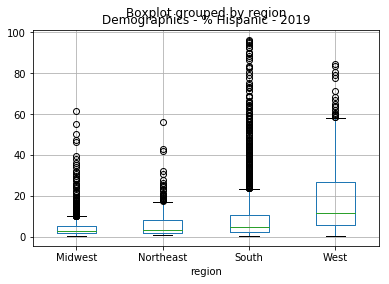

In [13]:
# Pandas has its own boxplot viewer

_ = gdf.boxplot(column='Demographics - % Hispanic - 2019',by='region')

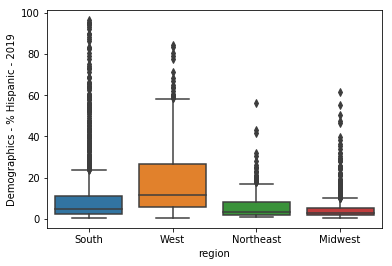

In [14]:
# Seaborn also has a boxplot viewer

ax = sns.boxplot(x='region',y='Demographics - % Hispanic - 2019',data=gdf)

C:\Users\Thomas Pingel\AppData\Local\ESRI\conda\envs\gis_analysis\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


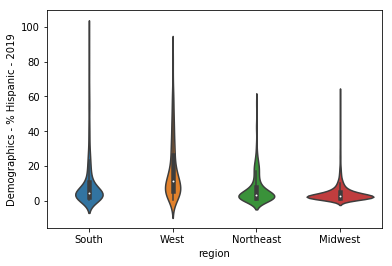

In [15]:
# Seaborn also has a violin plot that some people like better

sns.violinplot(x='region',y='Demographics - % Hispanic - 2019',data=gdf)

## Play along!  Make 5 different plots of your choosing

# Descriptive Statistics using Pandas Groups

In [16]:
# Use groups like Excel Pivot Tables to rapidly summarize by a category:

grp = gdf.groupby('region')
grp['Demographics - % Hispanic - 2019'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Midwest,1054.0,4.793865,5.930699,0.595153,1.923179,2.915185,5.186733,61.640868
Northeast,217.0,6.984608,8.297041,0.775418,1.795536,3.459779,8.088347,56.158134
South,1422.0,10.804581,15.826691,0.515152,2.496946,4.711092,10.976457,96.322959
West,414.0,18.455502,17.409991,0.659250,5.710814,11.641760,26.628324,84.262977


In [17]:
# You can request specific statistics on groups as well:

grp['Demographics - % Hispanic - 2019'].median()

region
Midwest       2.915185
Northeast     3.459779
South         4.711092
West         11.641760
Name: Demographics - % Hispanic - 2019, dtype: float64

In [18]:
grp['Demographics - % Hispanic - 2019'].max()

region
Midwest      61.640868
Northeast    56.158134
South        96.322959
West         84.262977
Name: Demographics - % Hispanic - 2019, dtype: float64

## Play along: Request statistics for 10 (total) combinations of variables and groups of your choosing

# T-Tests

T-Tests are used to compare mean differences between two specific groups.  If the p-value is less than .05, the difference in means is statistically significant.

In [19]:
var = 'Demographics - % Hispanic - 2019'
grp_a = df['region']=='Midwest'
grp_b = df['region']=='West'

x = df[var][grp_a]
y = df[var][grp_b]

[t,p] = stats.ttest_ind(x,y,nan_policy='omit')
print('t=',t,'p=',p)

t= -21.338897935315043 p= 1.8732273169160535e-88


# Effect Sizes

In [20]:
# Cohen's d is one measure effect size.  It's equal to the difference in mean, divided by the pooled standard deviation, 
# so is much like a z-score.

d = abs(np.nanmean(x)-np.nanmean(y)) / np.sqrt((np.std(x)**2 + np.std(y)**2)/2)
print(d)

0.9951566618301672


# ANOVAs

In [21]:
# ANOVA is like a T-test, but for more than one group

var = 'Demographics - % Hispanic - 2019'

grp_a = df['region']=='Midwest'
grp_b = df['region']=='West'
grp_c = df['region']=='South'
grp_d = df['region']=='Northeast'

a = df[var][grp_a]
b = df[var][grp_b]
c = df[var][grp_c]
d = df[var][grp_d]

f,p = stats.f_oneway(a,b,c,d)
print('f=',f,'p=',p)

f= 108.58043556108778 p= 6.91851437669979e-67
